# **Rice Classification using Different Models**

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
muratkokludataset_rice_dataset_commeo_and_osmancik_path = kagglehub.dataset_download('muratkokludataset/rice-dataset-commeo-and-osmancik')

print('Data source import complete.')


Using Colab cache for faster access to the 'rice-dataset-commeo-and-osmancik' dataset.
Data source import complete.


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-dataset-commeo-and-osmancik/Rice_Dataset_Commeo_and_Osmancik/Rice Dataset (Commeo and Osmancik).docx
/kaggle/input/rice-dataset-commeo-and-osmancik/Rice_Dataset_Commeo_and_Osmancik/Rice_Dataset_(Commeo and Osmancik)_Citation_Request.txt
/kaggle/input/rice-dataset-commeo-and-osmancik/Rice_Dataset_Commeo_and_Osmancik/Rice_Cammeo_Osmancik.xlsx
/kaggle/input/rice-dataset-commeo-and-osmancik/Rice_Dataset_Commeo_and_Osmancik/Rice_Cammeo_Osmancik.arff


**About Cammeo Rice and Osmancık Rice**

Cammeo and Osmancık are popular, long-grain rice varieties cultivated in Turkey, often used in similar dishes for their fluffy texture and ability to absorb flavors, though they have slight differences: Osmancık (developed 1997) is a classic, plump, aromatic Turkish staple, while Cammeo (introduced 2014) offers a slightly different, crystalline grain that's excellent for fluffy, separate grains, making them key components in Turkish cuisine and subjects for rice classification studies.

---

**Key Differences & Similarities**

Both are long-grain Turkish varieties used for similar cooking purposes, but differ in their specific development (Osmancık older/classic, Cammeo newer/Italian-origin).

They are frequently studied together in machine learning for rice classification due to their shared growing regions and similar but distinguishable morphological features.

---

**Dataset Attribute**

Attribute Information:

* Area: Returns the number of pixels within the boundaries of the rice grain.
* Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
* Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
* Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
* Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
* Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
* Extent: Returns the ratio of the region formed by the rice grain to the bounding box pixels
* Class: Commeo and Osmancik.

### I**mporting python libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### **Data Exploration**

In [8]:
data = pd.read_excel('/kaggle/input/rice-dataset-commeo-and-osmancik/Rice_Dataset_Commeo_and_Osmancik/Rice_Cammeo_Osmancik.xlsx')
data.head() # First 5 rows in data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [10]:
data.tail() # Last 5 rows

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik
3809,11434,404.709991,161.079269,90.868195,0.825692,11591,0.802949,Osmancik


In [86]:
data.to_excel('Rice_Dataset_Commeo_and_Osmancik.xlsx', index=False)

In [11]:
# Getting more info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [15]:
# Get statistical summary of data
data.describe(include='all')

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Osmancik
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2180
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,NaN
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,NaN
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,NaN
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862,NaN
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,NaN
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,NaN


In [16]:
# Check for missing values
data.isnull().sum()

,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Eccentricity,0
Convex_Area,0
Extent,0
Class,0


In [17]:
# Check for duplicated data
data.duplicated().sum()

np.int64(0)

In [18]:
# Check all columns incase some have hidden characters that cant be seen from data.info()
data.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [19]:
# it appears the Class column is an object so we check the values in it
data['Class'].value_counts()

,count
Class,
Osmancik,2180
Cammeo,1630


### **Visualization**

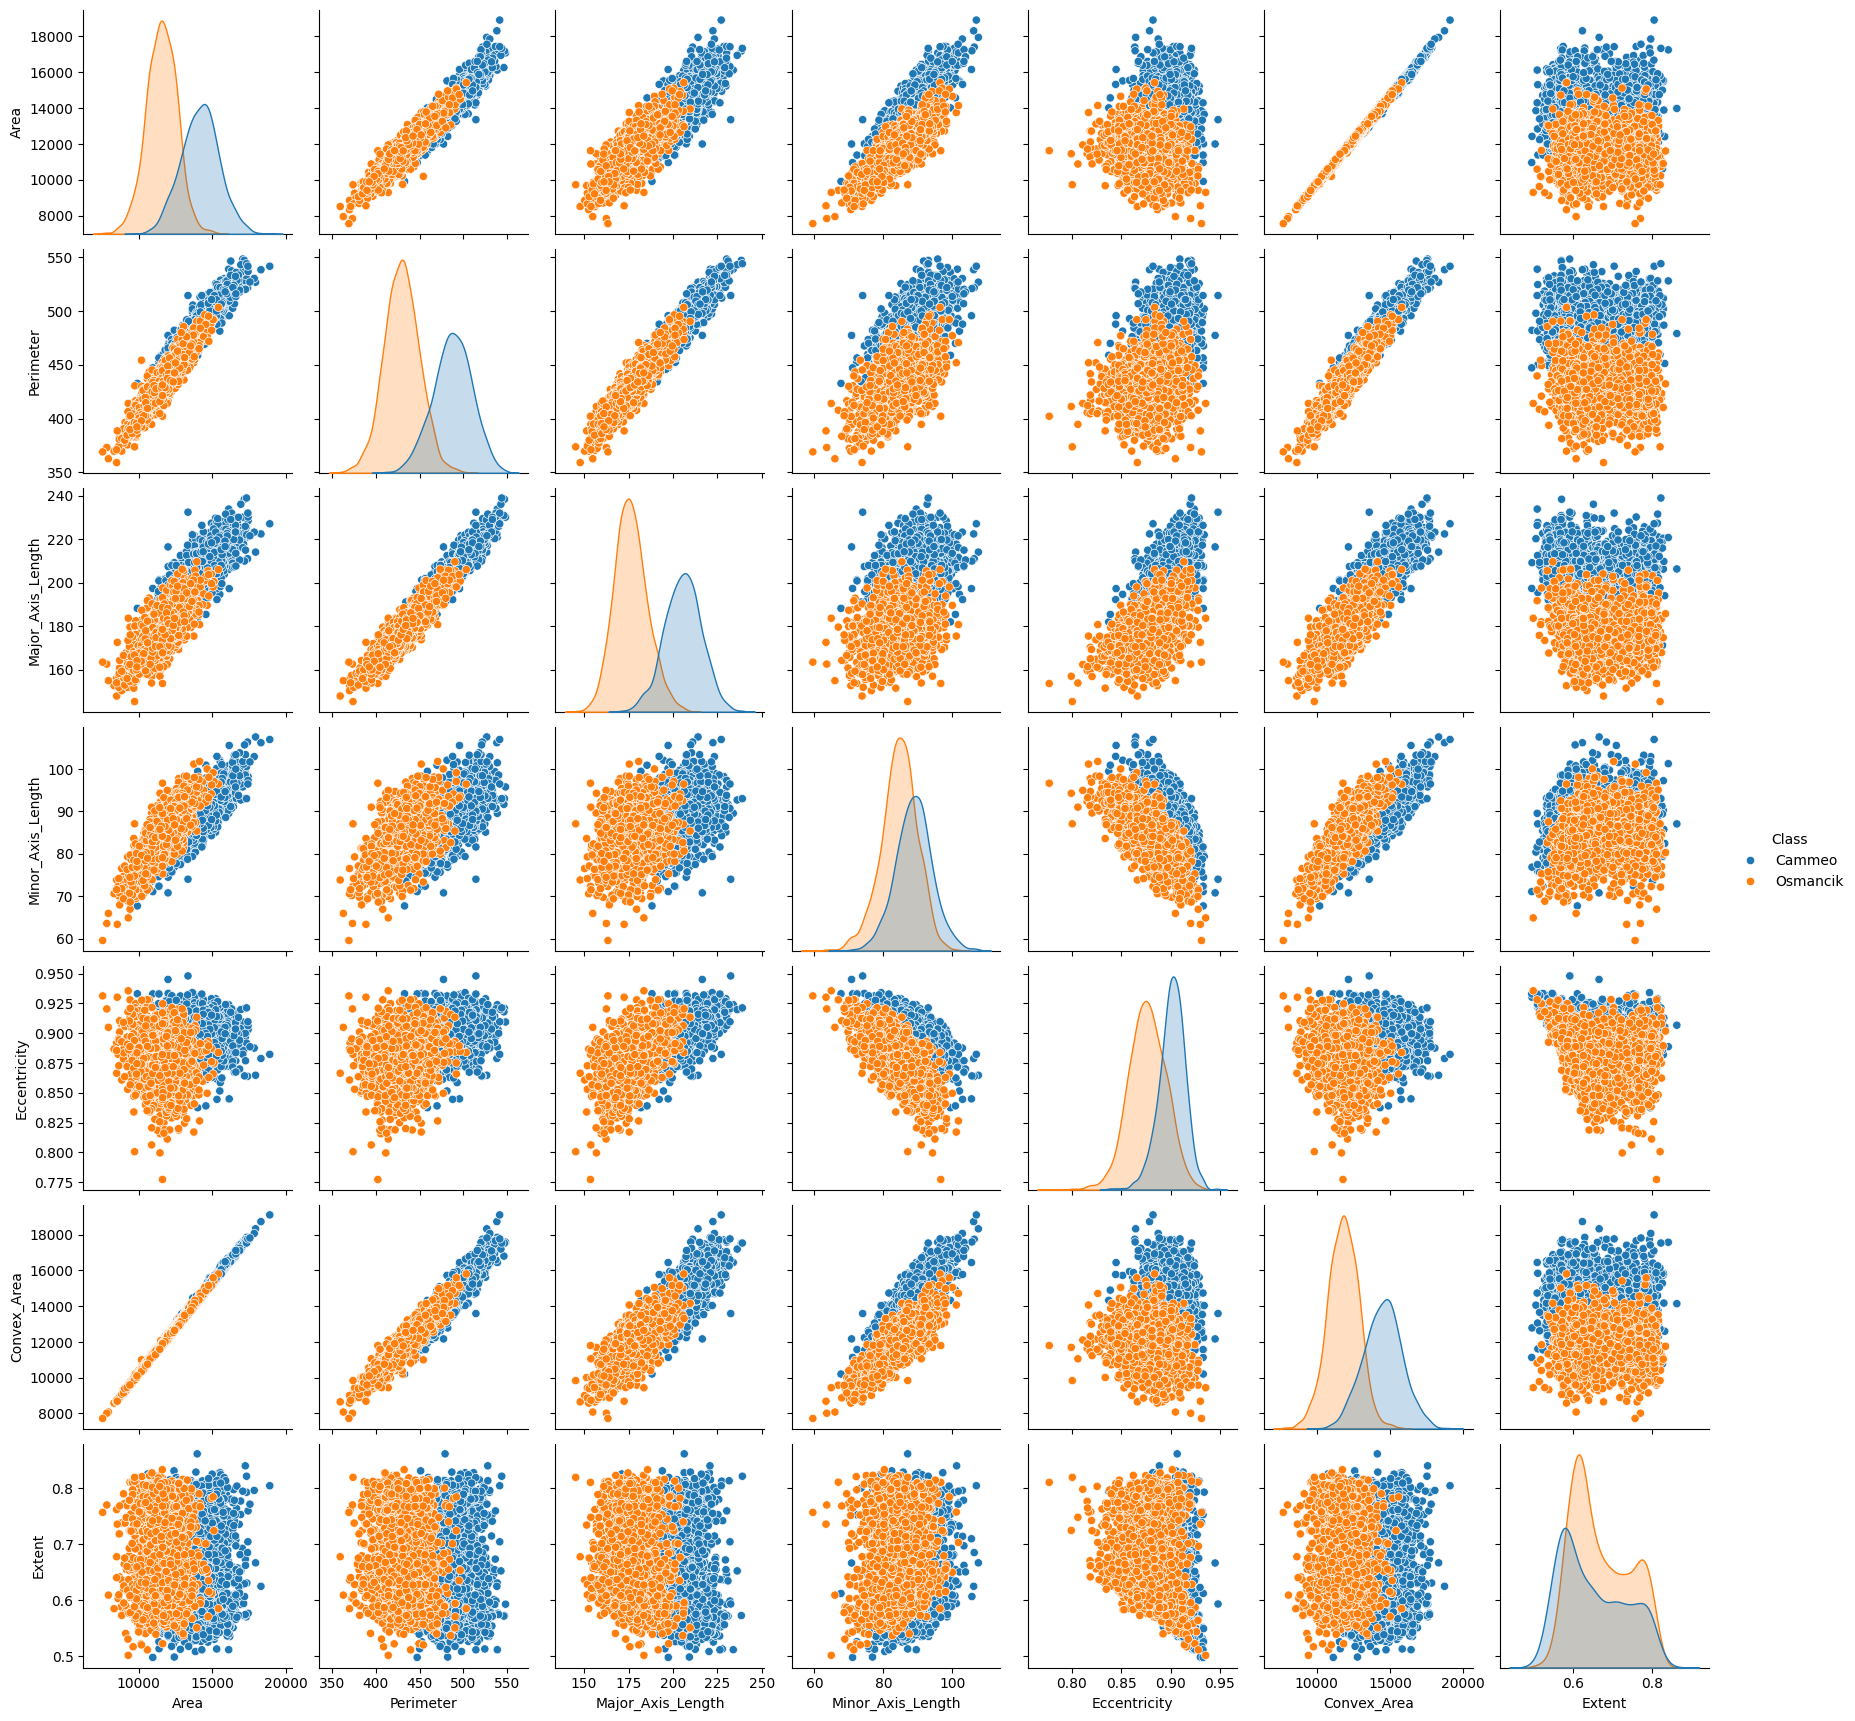

In [21]:
# View relationship between different columns as scatterplots
sns.pairplot(data, hue='Class', kind='scatter')
plt.show()

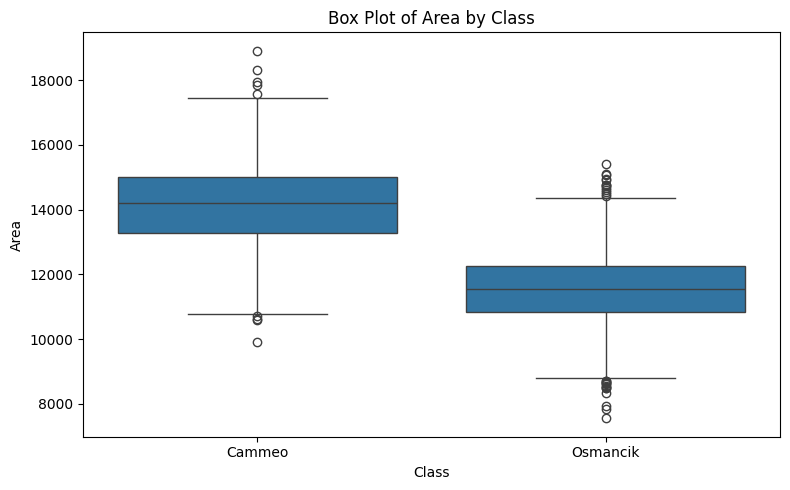

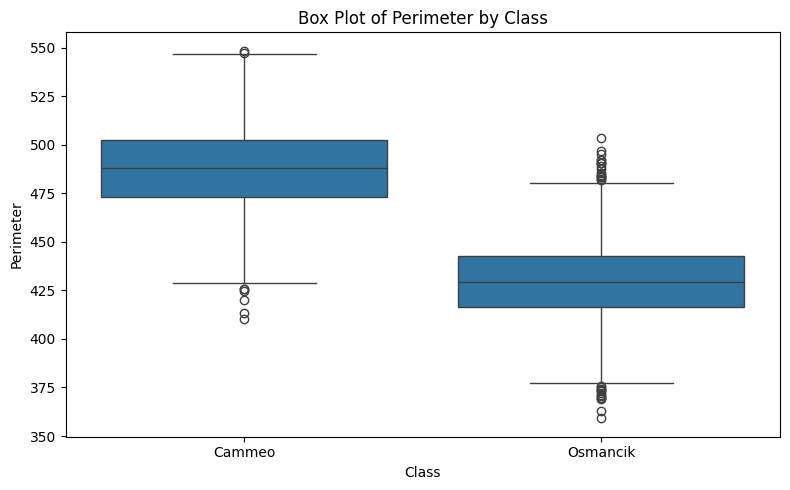

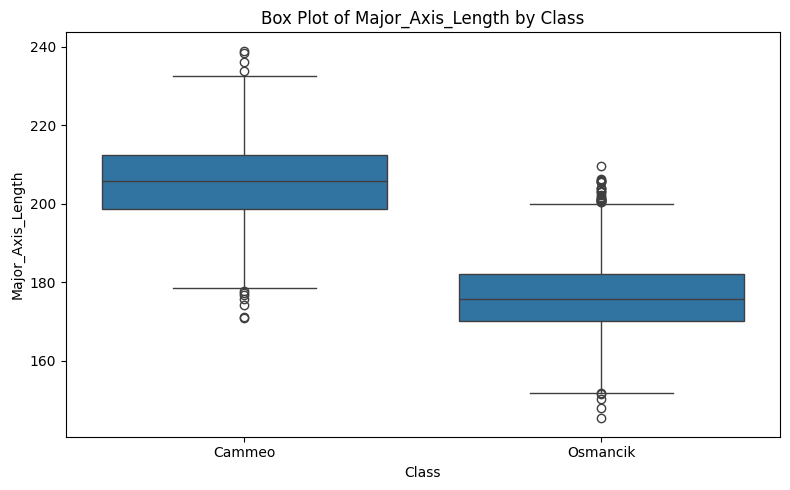

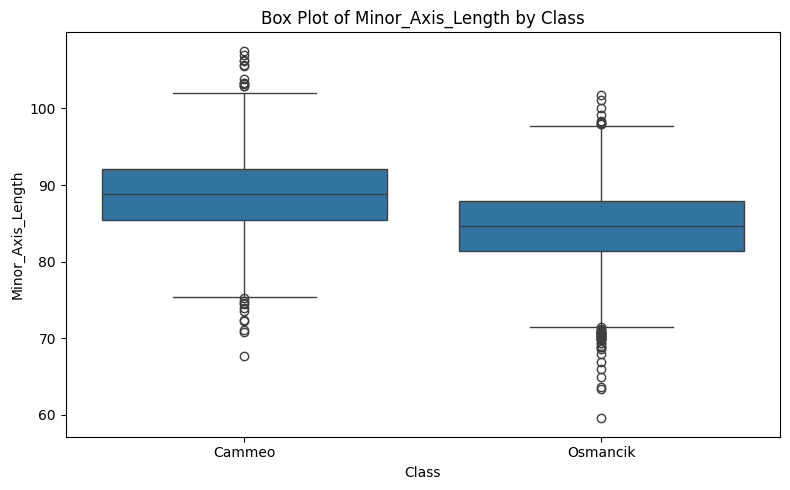

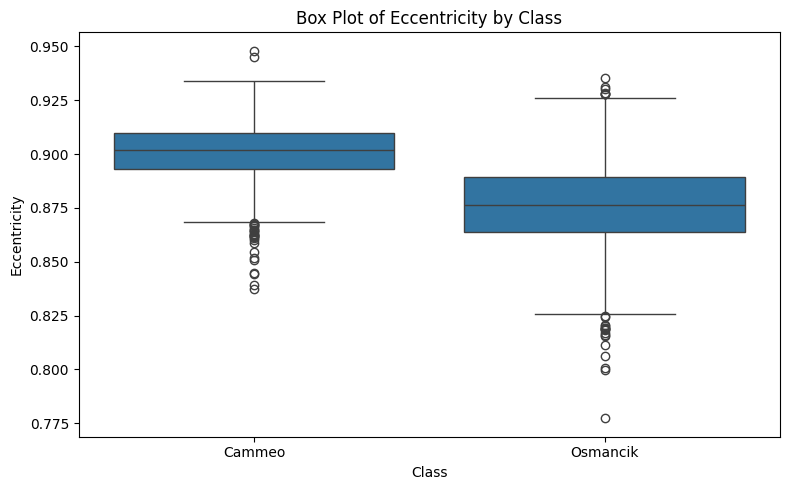

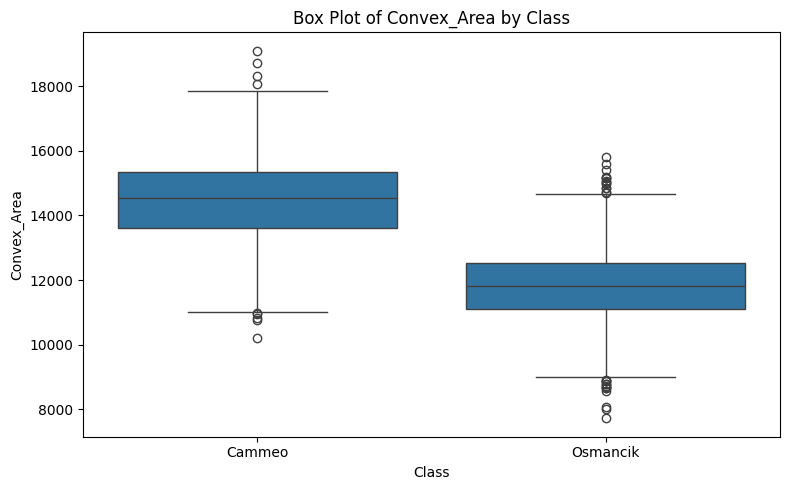

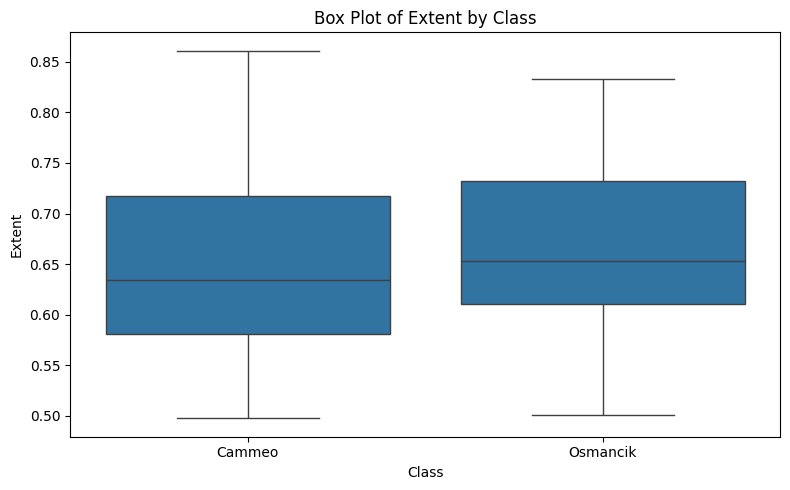

In [26]:
# Box plot to visualize distribution and check for outliers
cols_to_check = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']
x = 'Class'

for col in cols_to_check:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=x, y=col, data=data)
  plt.title(f'Box Plot of {col} by {x}')
  plt.xlabel(x)
  plt.ylabel(col)
  plt.tight_layout()
  plt.show()

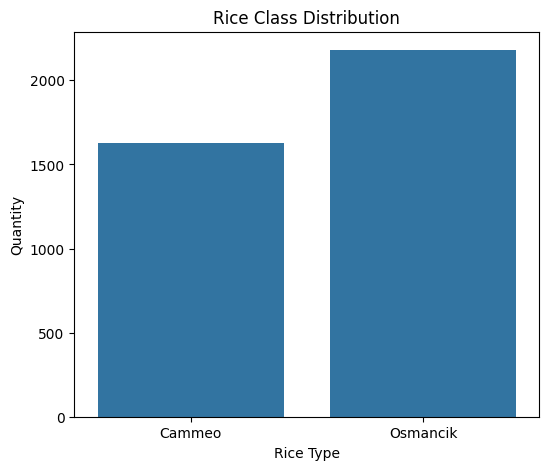

In [27]:
# Checking the class categorical column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class')
plt.title('Rice Class Distribution')
plt.xlabel('Rice Type')
plt.ylabel('Quantity')
plt.show()

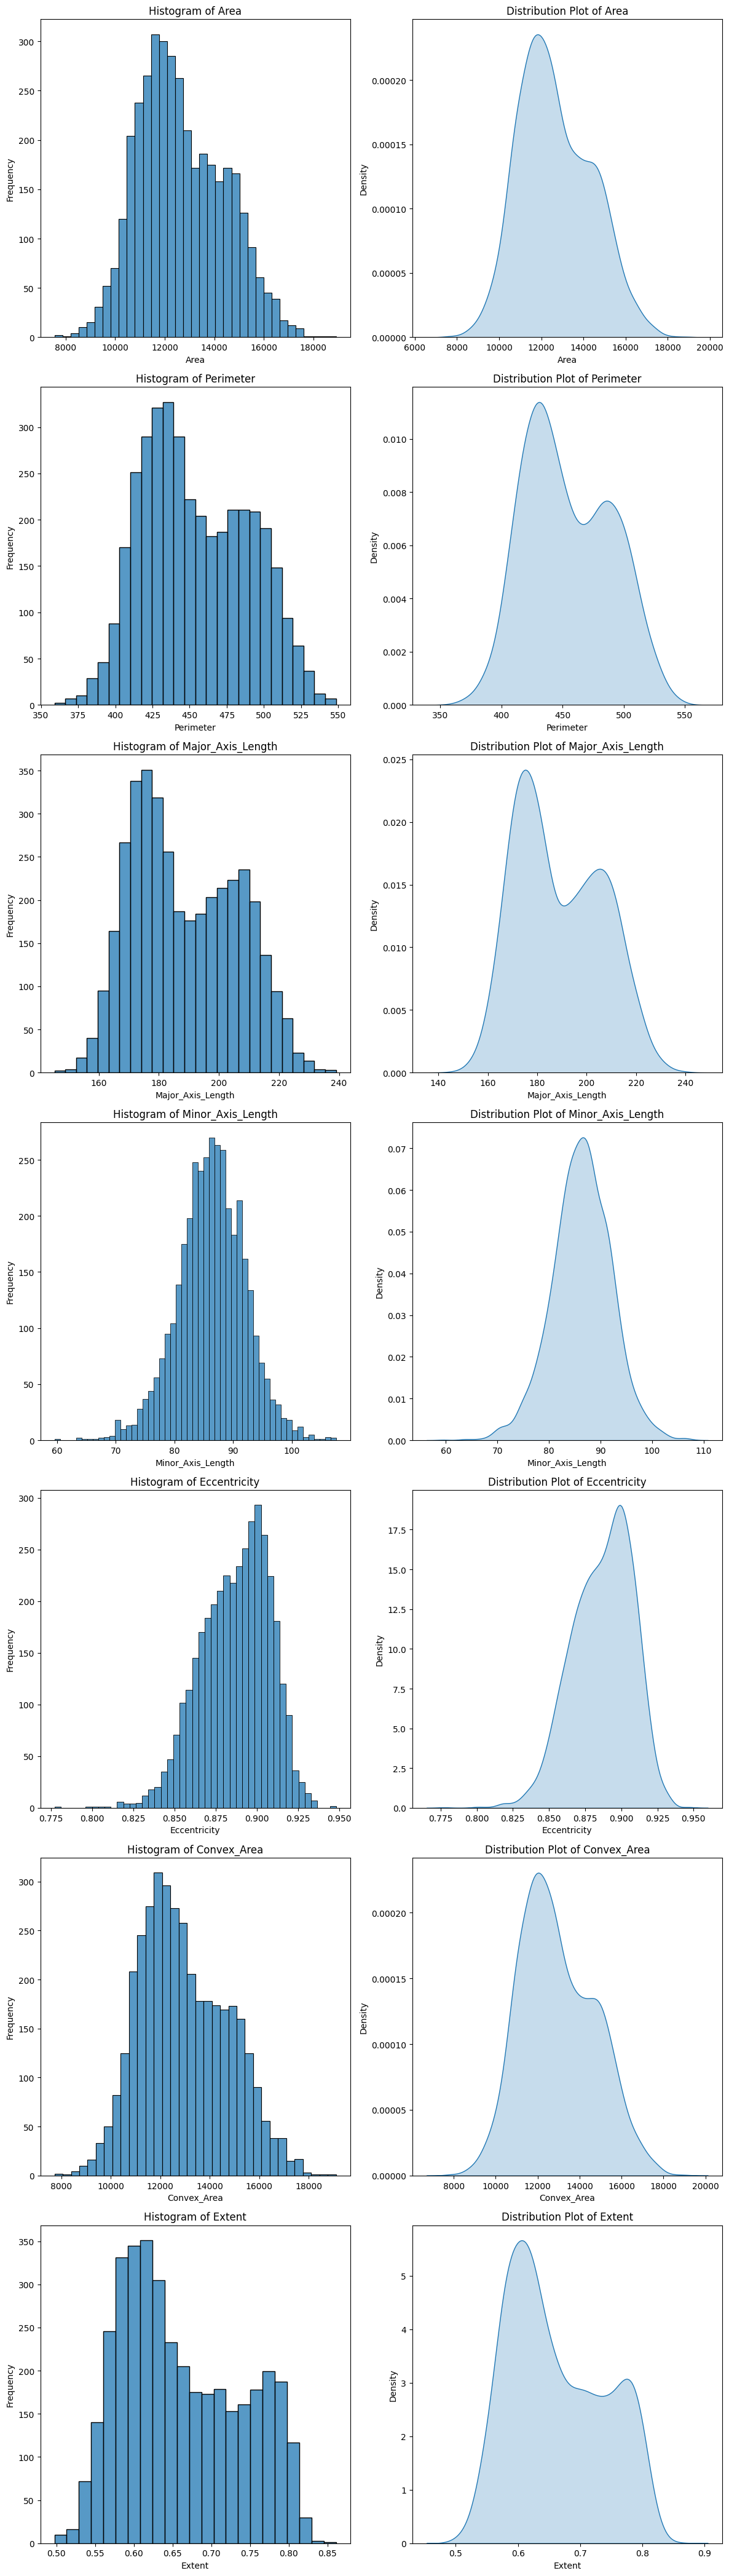

In [38]:
cols_len = len(cols_to_check)

fig, axes = plt.subplots(cols_len, 2, figsize=(12, 6 * cols_len))

# Flatten the axes array for easier iteration if there's only one row or column
if cols_len == 1:
    axes = axes.reshape(1, -1)

for i, col in enumerate(cols_to_check):
    # Histogram plot in the first column of the current row
    sns.histplot(data=data, x=col, kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Distribution plot (KDE) in the second column of the current row
    sns.kdeplot(data=data, x=col, fill=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution Plot of {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()

**It shows most of the data evenly distributed although Ecentricity appeared a little right skewed**

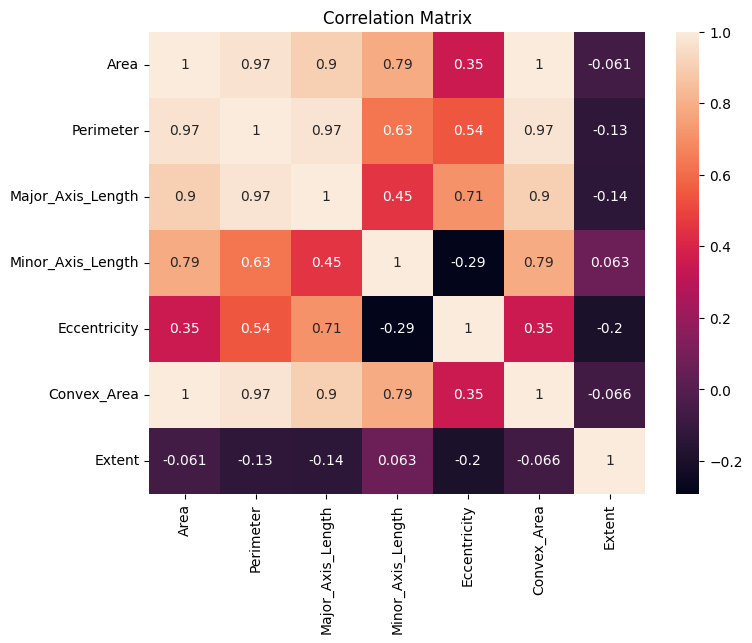

In [40]:
# Checking the correlation matrix of the data using heat map
corr_matrix = data[cols_to_check].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# **Build Model**

In [77]:
# Define feature and target variable
X = data.drop('Class', axis=1)
y = pd.get_dummies(data['Class'], drop_first=True).astype(int)

In [78]:
X.head(2)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436


In [79]:
y.head(2)

,Osmancik
0,0
1,0


### **Train Test Split**

In [80]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=12, stratify=y)

In [81]:
# Scaling data for features scaling
scaler = StandardScaler()

In [82]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

`y_train and y_test` are column vectors (DataFrame) instead of a 1D array as expected by scikit-learn.

So we fix this by converting `y_train` to a 1D array using `.ravel()`  before passing it to `fit()`.



In [83]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### **Grid Search for best parameters on different models**

In [84]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=12)
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10]
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")


# Random Forest Model
rf_model = RandomForestClassifier(random_state=12)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")


# KNN Model
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
print(f"Best parameters for K-Nearest Neighbors: {knn_grid_search.best_params_}")


# Logistic Regression Model
lr_model = LogisticRegression(solver='liblinear', random_state=12)
lr_param_grid = {
    'C': [0.1, 1, 10, 100]
}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)
print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 10}
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 150}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 9}
Best parameters for Logistic Regression: {'C': 10}


### **Train and Evaluate Models**




--- Evaluating Decision Tree ---
Accuracy: 0.913
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       408
           1       0.92      0.93      0.92       545

    accuracy                           0.91       953
   macro avg       0.91      0.91      0.91       953
weighted avg       0.91      0.91      0.91       953



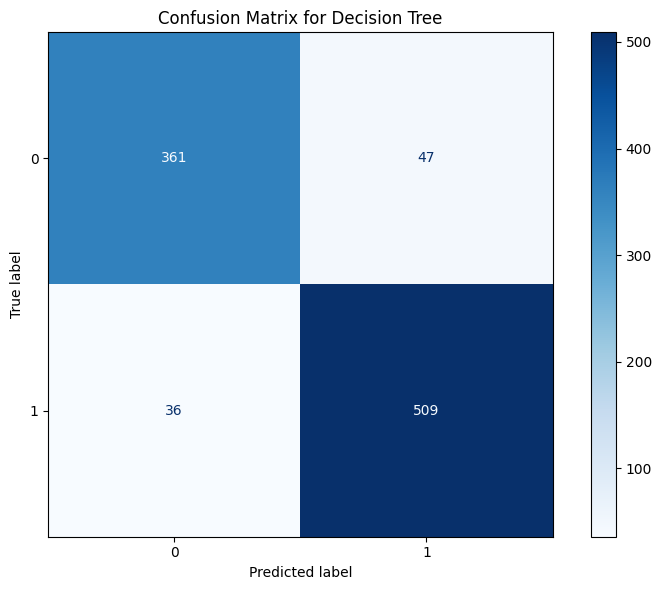



--- Evaluating Random Forest ---
Accuracy: 0.929
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       408
           1       0.93      0.94      0.94       545

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.93       953



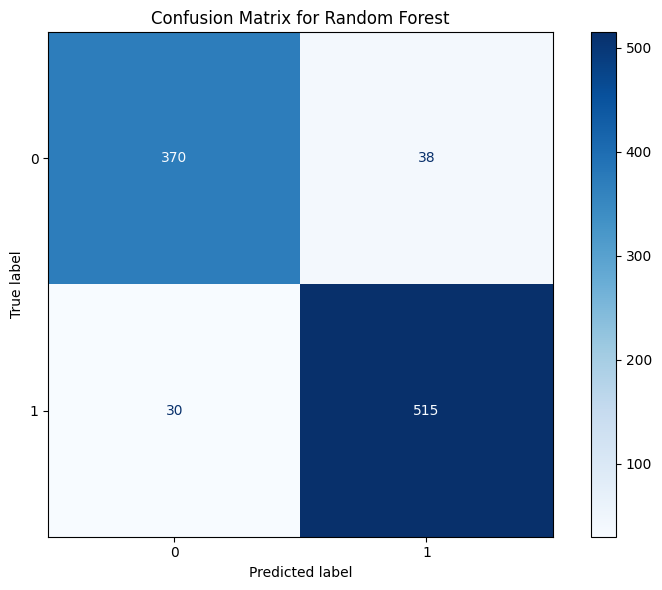



--- Evaluating K-Nearest Neighbors ---
Accuracy: 0.923
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       408
           1       0.94      0.93      0.93       545

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953



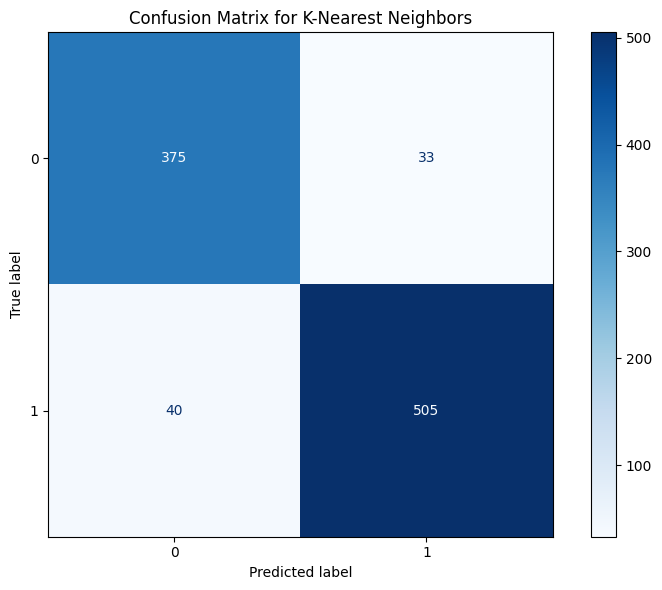



--- Evaluating Logistic Regression ---
Accuracy: 0.931
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       408
           1       0.93      0.94      0.94       545

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.93       953



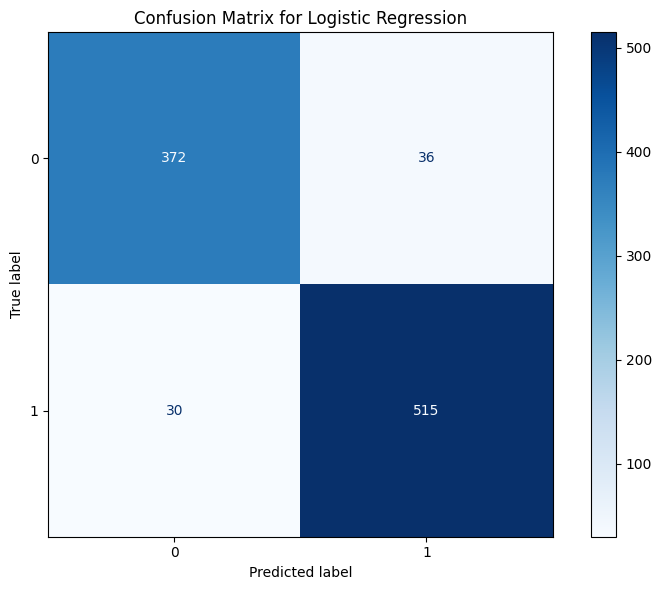

In [85]:
# Train model using the best parameters from the grid search
models = {
    'Decision Tree': dt_grid_search,
    'Random Forest': rf_grid_search,
    'K-Nearest Neighbors': knn_grid_search,
    'Logistic Regression': lr_grid_search
}


for name, grid_search_result in models.items():
    print(f"\n\n--- Evaluating {name} ---")
    best_model = grid_search_result.best_estimator_

    # Predict on the test data
    y_pred = best_model.predict(X_test)

    # Calculate and print accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
    ax.set_title(f"Confusion Matrix for {name}")
    plt.tight_layout()
    plt.show()

# **Model Performance Comparison**

Based on the accuracy scores and classification reports:

*   **Decision Tree**: Accuracy: 0.913
*   **Random Forest**: Accuracy: 0.929
*   **K-Nearest Neighbors**: Accuracy: 0.923
*   **Logistic Regression**: Accuracy: 0.931

Based on the accuracy scores, **Logistic Regression** performed the best with an accuracy of approximately 0.931 `(93%)`. Random Forest was a close second with 0.929 `(92%)`.

### **Best Performing Model: Logistic Regression**

**Key Characteristics and Performance Summary:**

*   **Accuracy:** The Logistic Regression model achieved the highest accuracy of 0.9307 on the test set, indicating that it correctly classified about 93.07% of the rice grain samples.
*   **Precision and Recall (Class 0 - Cammeo):** For 'Cammeo' rice (Class 0), the model showed a precision of 0.93 and a recall of 0.91. This means that when it predicted a rice grain as 'Cammeo', it was correct 93% of the time, and it identified 91% of all actual 'Cammeo' rice grains.
*   **Precision and Recall (Class 1 - Osmancik):** For 'Osmancik' rice (Class 1), the model achieved a precision of 0.93 and a recall of 0.94. This indicates that 93% of its 'Osmancik' predictions were correct, and it successfully identified 94% of all actual 'Osmancik' rice grains.
*   **F1-Score:** The F1-scores for both classes are high (0.92 for Cammeo and 0.94 for Osmancik), suggesting a good balance between precision and recall for both classes.
*   **Confusion Matrix Analysis:** The confusion matrix visually confirms these findings, showing a high number of true positives and true negatives, and relatively few false positives and false negatives for both classes.

Logistic Regression, despite being a simpler linear model, proved to be very effective for this binary classification problem, likely due to the clear separation of the classes in the feature space as suggested by the earlier visualizations.